## 10.2 Time independent Schrodinger equation. Shooting method
### Here we solve the time independent Schrodinger equation in one dimension for the  particle in a box problem

In [1]:
#using LinearAlgebra       #eigen()
using Plots
#using SparseArrays
#using Arpack              #for eigs()
gr()

Plots.GRBackend()

In [2]:
# Function to calculate wave function  

# based on 'Computational Physics' book by N Giordano and H Nakanishi 
#  Section 10.2 
#  by Kevin Berwick   
  

function calculate_psi(psi, N, delta_x, E, b,V) 
# This function calculates psi % Make psi_prime(0) =0 for an even parity solution;   

    for i=2:N-1                    
        psi[i+1]=2*psi[i]-psi[i-1]-2*(E-V[i])*delta_x^2*psi[i]                 
    
        if abs(psi[i+1]) > b #  if psi is diverging, exit the loop;                      
            return psi, i 
        end 
    end
end

calculate_psi (generic function with 1 method)

In [7]:
#  Program to calculate wave function  
#  based on 'Computational Physics' book by N Giordano and H Nakanishi 
#  Section 10.2 
#  by Kevin Berwick

# Initialize
N=200 
delta_x=0.01 
E_initial=1.879 
delta_E=0.1 
x=[delta_x: delta_x: N*delta_x]

# Create half the potential well   
V = zeros(N)
for i = 100:200
    V[i] = 1000    # Create an intial vector to hold the wavefunction
end

b= 1.5             #  suggested cutoff parameter

# Implement psi_prime(0)=0 for an even parity solution by  
# letting psi_in(0) and psi_in(-1)=0; Since this is the center of the well, we use indices 200 and 199 for these positions.  

# Initialise last_diverge which keeps track of the diverging trend to zero 
# since we don't know this direction yet   
last_diverge=0 

# If delta_E is small enough then the current E is acceptable. We define a minimum value for this quantity here   
minimum_delta_E=0.005
# initialise E   
E=E_initial

1.879

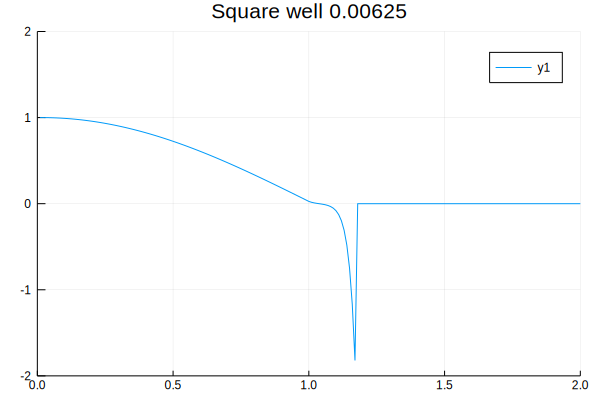

stdin> 


In [9]:
# MAIN LOOP

gr(show = :ijulia)

#plt = plot(x, psi)
#plt.close()

while abs(delta_E)>minimum_delta_E; 
    
    #     Initialise      
    psi= zeros(N)      
    psi[1]=1
    psi[2]=1      
    
    # Calculate wavefunction          
    psi,i = calculate_psi(psi, N, delta_x, E, b, V)
    
    # Visualise results with movie         
    display(plot(x, psi))
    title!("Square well $(delta_E)")
    xlims!(0, 2)
    ylims!(-2, 2)
    #axis([0 2 -2 2]);        
    #xlabel("distance");        
    #ylabel("Wavefunction");        
       
    sleep(0.5);
    readline(stdin)
    
    if sign(psi[i+1])!=sign(last_diverge);                                  
        # If last value of psi evaluated before                               
        # breakout from calculate_psi function and                               
        # last diverge are of different signs, turn                               
        # round direction of varying E and halve its                               
        # value           
        
        delta_E=-delta_E/2;          
    end;            
    
    E=E+delta_E            
    last_diverge=sign(psi[i+1]);   
end